In [186]:
%matplotlib inline

Exploring Clustering and Bagging with Nilearn's ADHD dataset
----------

**Goal:** Access the ADHD dataset and split it into two groups. First, experiment with clustering in both groups and use a distance metric to assess how similar the two resulting clusterings are. Then, separately, bag the data and then use clustering to see how much better the similarity metric gets. Use this experimentation to get more ideas about hypotheses.

**Table of Contents:**
    1. imports and initial experimentation with data
    2. implementing Ward Agglomerative Clustering without first bagging the data
    3. assessment of previous clustering
    4. bagging the data in each of the groups and clustering
    5. integrating the bags' parcellations within each group
    6. conclusion (...?)

Imports and Initial Experimentation with Data
--------

In [187]:
import numpy as np
import scipy as sp
import nilearn
from nilearn import datasets

In [188]:
dataset = datasets.fetch_adhd()

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [189]:
#figuring out how the data is structured
display(dataset)

{'func': ['/home/pranay/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0023012/0023012_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0027011/0027011_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0027018/0027018_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0027034/0027034_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/0027037/0027037_rest_tshift_RPI_voreg_mni.nii.gz',
  '/home/pranay/nilearn_data/adhd/data/1019436/1019436_rest_tshift_RPI_voreg_mni.nii.gz',
  

In [190]:
print(len(dataset))
display(dataset.func)

4


['/home/pranay/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0023012/0023012_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027011/0027011_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027018/0027018_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027034/0027034_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027037/0027037_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/1019436/1019436_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilear

In [191]:
print(len(dataset.func))
display(dataset.func[0:15])

30


['/home/pranay/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0023012/0023012_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027011/0027011_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027018/0027018_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027034/0027034_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/0027037/0027037_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilearn_data/adhd/data/1019436/1019436_rest_tshift_RPI_voreg_mni.nii.gz',
 '/home/pranay/nilear

Implementing Ward Agglomerative Clustering Without Bagging
---------

In [192]:
#this code from nilearn was used as an example for part of this section: 
#https://nilearn.github.io/auto_examples/03_connectivity/plot_rest_parcellations.html#sphx-glr-auto-examples-03-connectivity-plot-rest-parcellations-py

/home/pranay/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


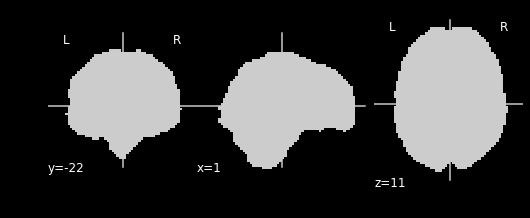

In [193]:
#using a brain mask to make sure we're not including voxels that aren't actually in the brain
#used some code/ideas from nilearn.github.io/auto_examples/01_plotting/plot_visualization.html
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(dataset.func[0])

#possible source of error is I'm only using first scan to get the mask, but I will fix this later

#this is just using the first scan to visualize the mask
from nilearn import plotting
plotting.plot_epi(mask_img)


In [194]:
from nilearn.regions import Parcellations

#creating two ward objects from Parcellations to fit on the two groups

ward1 = Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img)

ward2 = Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img)





In [206]:
#dividing the data into two equally-sized groups and then performing the clustering
group1 = dataset.func[:15]
group2 = dataset.func[15:]
#only using 10 scans now because otherwise the error is 
#too low to be able to meaningfully compare it to error after bagging

ward1.fit(group1)
ward2.fit(group2)

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data


/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:301: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.memory_level == 0 and self.memory.cachedir is not None:
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 0.000755, ...,  0.000909],
       ...,
       [-0.001214, ..., -0.000701]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
____________________________________________________estimator_fit - 0.4s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([25, ..., 11]), <nibabel.nifti1.Nifti1Image object at 0x7f43e23d1cc0>)
___________________________________________________________unmask - 0.0s, 0.0min

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 0.000236, ...,  0.000511],
       ...,
       [ 0.000314, ..., -0.001342]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
____________________________________________________estimator_fit - 0.4s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([44, ..., 10]), <nibabel.nifti1.Nifti1Image object at 0x7f43e2075278>)
___________________________________________________________unmask - 0.0s, 0.0min

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


Parcellations(detrend=False, high_pass=None, low_pass=None,
       mask=<nibabel.nifti1.Nifti1Image object at 0x7f443c04cc50>,
       mask_args=None, mask_strategy='epi',
       memory=Memory(location=nilearn_cache/joblib), memory_level=1,
       method='ward', n_jobs=1, n_parcels=50, random_state=0,
       smoothing_fwhm=2, standardize=False, t_r=None, target_affine=None,
       target_shape=None, verbose=1)

/home/pranay/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


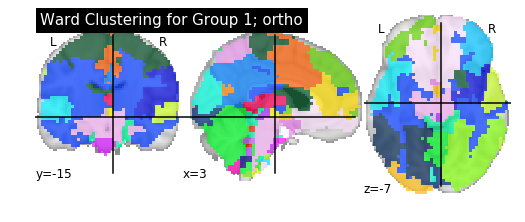

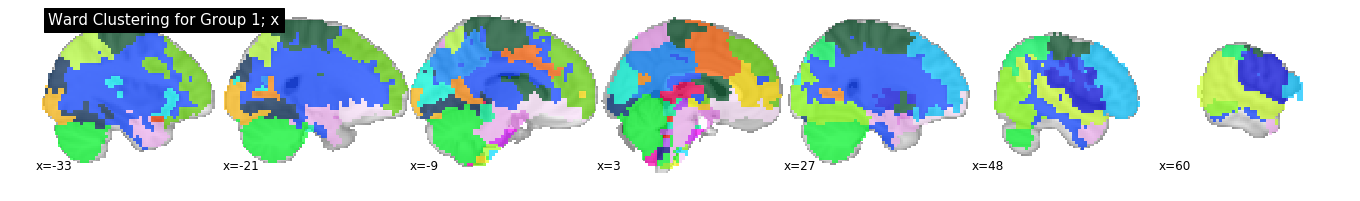

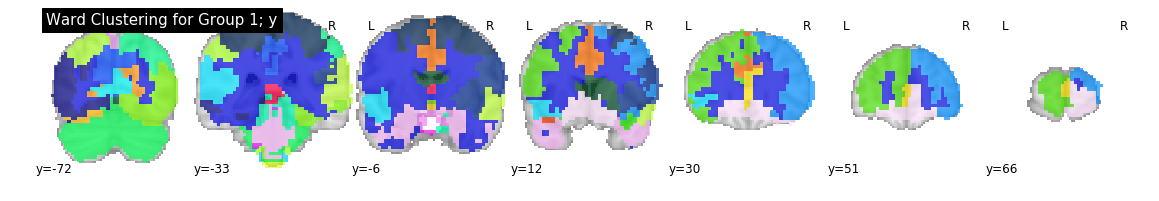

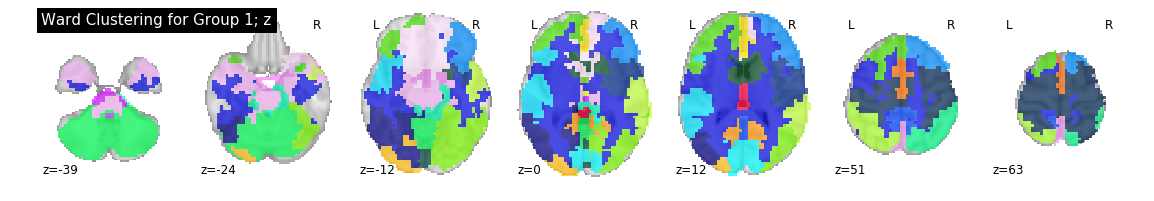

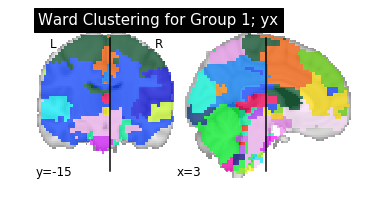

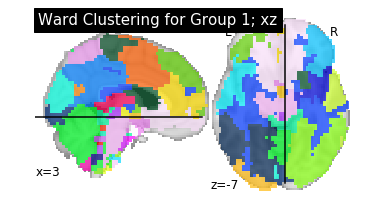

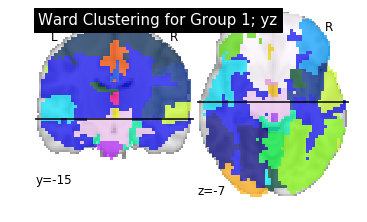

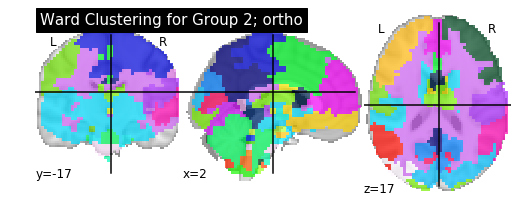

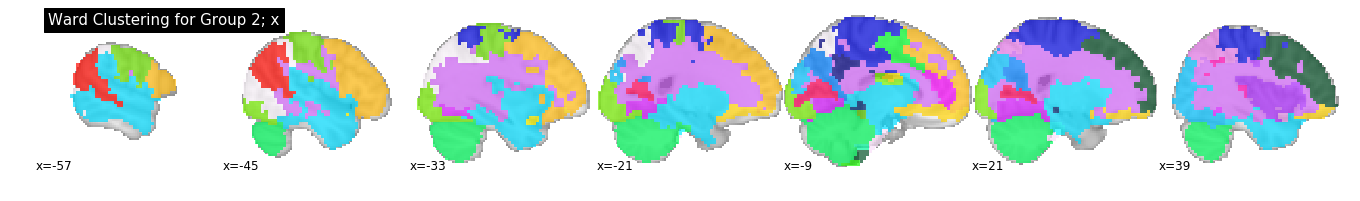

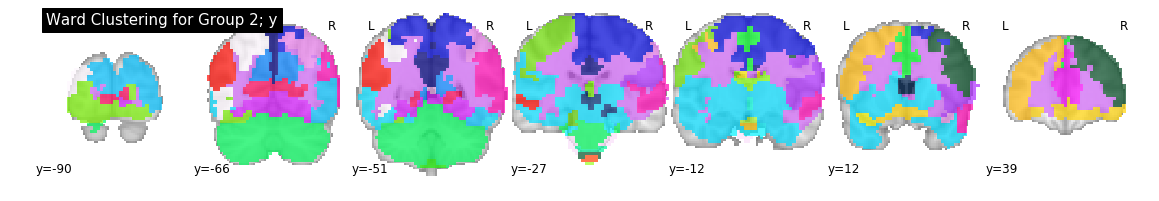

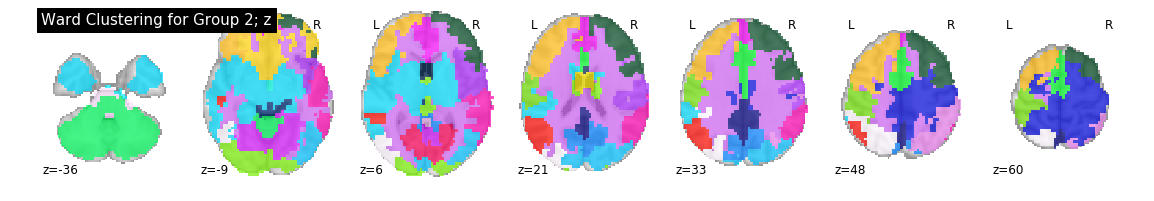

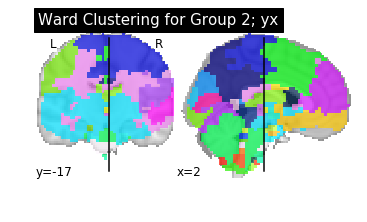

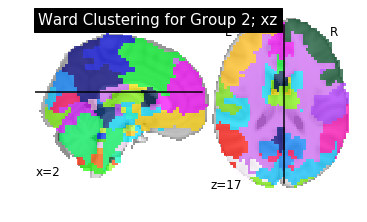

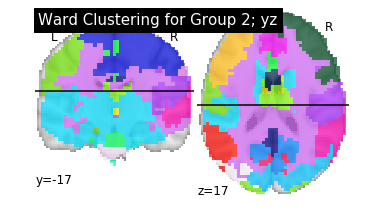

In [207]:
#visualizing the brain parcellations

ward1_image = ward1.labels_img_
ward2_image = ward2.labels_img_

from nilearn.image import mean_img, index_img

display_modes = ['ortho','x','y','z','yx','xz','yz']

for mode in display_modes:
    ward1_plot = plotting.plot_roi(ward1_image, title=str("Ward Clustering for Group 1; " + mode), display_mode=mode)
    
for mode in display_modes:
    ward2_plot = plotting.plot_roi(ward2_image, title=str("Ward Clustering for Group 2; " + mode), display_mode=mode)

Assessing the Stability of the Above Clustering
----------

In [208]:
from  sklearn.metrics.cluster import adjusted_rand_score

#saving the Nifti images into files
ward1_image.to_filename('ward1_parcellation.nii.gz')
ward2_image.to_filename('ward2_parcellation.nii.gz')

In [209]:
#converting images to np arrays - required for adjusted_rand_score

import nibabel as nib
ward1_nib = nib.load('ward1_parcellation.nii.gz')
ward1_np = np.array(ward1_nib.dataobj)

ward2_nib = nib.load('ward2_parcellation.nii.gz')
ward2_np = np.array(ward2_nib.dataobj)


In [210]:
#adjusted_rand_score also specifically requires the numpy arrays to be 1D, but these are 3D,
#so we need to fix this by appending all the data from the 3D arrays into 1D arrays

ward1_1Dnp = np.ravel(ward1_np)
ward2_1Dnp = np.ravel(ward2_np)
        

In [416]:
w = list(ward1_1Dnp)

from collections import defaultdict
wd = defaultdict(int)
for x in w:
    wd[x] += 1
print(wd)

defaultdict(<class 'int'>, {0: 209087, 25: 1773, 22: 2846, 7: 16400, 6: 2165, 15: 1368, 47: 2629, 3: 4534, 9: 3519, 16: 5996, 18: 65, 49: 2076, 5: 185, 12: 1173, 33: 794, 4: 917, 45: 308, 14: 557, 41: 142, 8: 1817, 10: 60, 23: 78, 39: 80, 34: 1054, 29: 468, 26: 25, 17: 20, 38: 181, 19: 3784, 44: 36, 21: 31, 48: 16, 40: 26, 50: 34, 46: 189, 1: 32, 43: 16, 37: 6, 13: 10, 36: 8, 42: 24, 30: 6, 27: 16, 31: 22, 20: 20, 2: 2864, 24: 1383, 32: 680, 28: 16, 11: 2064, 35: 33})


In [279]:
#inputting the numpy arrays from ward1 and ward2 into adjusted_rand_score
#(the numpy arrays are lists of the cluster labels for each voxel,)

print(adjusted_rand_score(ward1_1Dnp,ward2_1Dnp))


0.9885461289246722


The adjusted_rand_score similarity metric is a value between -1 and 1, where random clusterings get a score of 0 and identitical clusterings (when the labels can be permuted in the 1D array to match perfectly) get a score of 1. This means that without bagging, the Ward Clustering resulted in an already stable clustering. If bagging was to increase cluster stability, then the same clustering procedure applied above onto the bags should result in an adjusted_rand_score of greater than 98%.

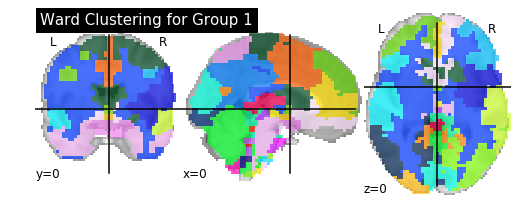

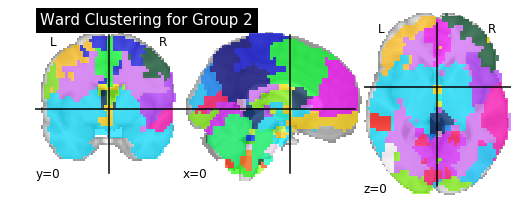

In [212]:
#just to double check, we are going to visualize the parcellations here
#they should look identical based on the rand score above

def compare(coords = (0,0,0)):
    ward1_plot = plotting.plot_roi(ward1_image, title=str("Ward Clustering for Group 1"), display_mode="ortho", cut_coords=coords)
    ward2_plot = plotting.plot_roi(ward2_image, title=str("Ward Clustering for Group 2"), display_mode="ortho", cut_coords=coords)
    
compare()

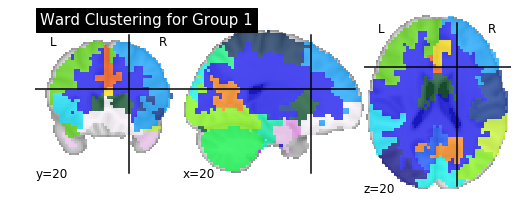

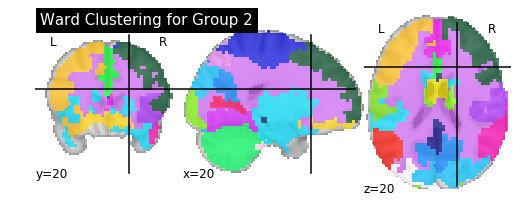

In [213]:
compare((20,20,20))

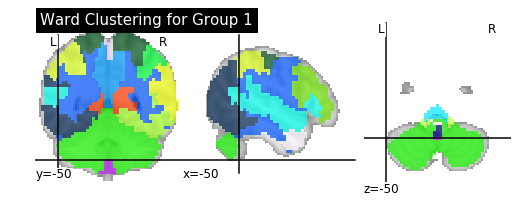

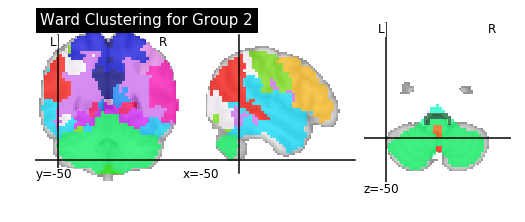

In [214]:
compare((-50,-50,-50))

In [251]:
#checking to see if the number of voxels in each clustering is the same
#(they should be the same since the same mask was used on all scans)
print(len(ward1_1Dnp))
print(len(ward2_1Dnp))

271633
271633


Bagging the Data in Each of the Groups and Clustering
----------

In [336]:
#Separating the first 15 samples and the last 15 into the same number of bags. We can use 3, 5, or 15 bags - 
#we can try all later to see if more bags leads to higher cluster stability but for now we'll do 3 bags each

#to randomly create the bags, a random permutation of [0,1,2,3,...,29] is chosen and each 5 consecutive 
#samples in the permutation are grouped into the bags

from numpy.random import permutation

l = np.random.permutation(30)
#l = l.tolist()

print(l)

def makeBag(start, end):
    '''Takes in the starting and ending indices from l, which contains the permutation of [0,1,...29].
    For each element n in the specified range of l, the nth scan is appended to the bag. 
    A list of the scans in the bag is returned.'''
    x  = []
    for y in range(start-1,end):
        x.append(dataset.func[l[y]])
    return x

bagged_group1 = [makeBag(0,5),makeBag(5,10),makeBag(10,15)]
bagged_group2 = [makeBag(15,20),makeBag(20,25),makeBag(25,30)]

ward1_bagged = [Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img),
                Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img),
                Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img)]
ward2_bagged = [Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img),
                Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img),
                Parcellations(method='ward', n_parcels = 50,standardize=False,
                      smoothing_fwhm=2,memory='nilearn_cache',memory_level=1,verbose=1,mask=mask_img)]

print(bagged_group1)

[29 10 22 18  4  0 14 19 27  1 23  8  3 16 28 20  6  7 15  2  9 24 12 26
 25 17  5 21 13 11]
[['/home/pranay/nilearn_data/adhd/data/1206380/1206380_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/4016887/4016887_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/1019436/1019436_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/3205761/3205761_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/2497695/2497695_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz'], ['/home/pranay/nilearn_data/adhd/data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/1552181/1552181_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_data/adhd/data/2950754/2950754_rest_tshift_RPI_voreg_mni.nii.gz', '/home/pranay/nilearn_d

In [337]:
for x in range(0,3):
    ward1_bagged[x].fit(bagged_group1[x])
    ward2_bagged[x].fit(bagged_group2[x])

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 0.00028 , ...,  0.001056],
       ...,
       [ 0.001901, ..., -0.005328]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[ 0.00028 , ...,  0.001901],
       ...,
       [ 0.001056, ..., -0.005328]], dtype=float32)

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 0.00069 , ...,  0.000712],
       ...,
       [-0.001511, ...,  0.000466]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[ 0.00069 , ..., -0.001511],
       ...,
       [ 0.000712, ...,  0.000466]], dtype=float32), 
<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>, n_clus

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 0.000737, ...,  0.00082 ],
       ...,
       [ 0.001007, ..., -0.002619]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[ 0.000737, ...,  0.001007],
       ...,
       [ 0.00082 , ..., -0.002619]], dtype=float32), 
<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>, n_clus

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 0.000573, ...,  0.000248],
       ...,
       [ 0.00119 , ..., -0.000647]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[ 0.000573, ...,  0.00119 ],
       ...,
       [ 0.000248, ..., -0.000647]], dtype=float32), 
<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>, n_clus

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 5.012465e-04, ...,  9.326248e-04],
       ...,
       [ 9.798938e-05, ..., -5.340436e-04]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[ 5.012465e-04, ...,  9.798938e-05],
       ...,
       [ 9.326248e-04, ..., -5.340436e-04]], dtype=float32), 
<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elemen

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[0.000246, ..., 0.00036 ],
       ...,
       [0.000616, ..., 0.000991]], dtype=float32), 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>,
            linkage='ward', memory=Memory(location=nilearn_cache/joblib),
            n_clusters=50, pooling_func='deprecated'))
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[0.000246, ..., 0.000616],
       ...,
       [0.00036 , ..., 0.000991]], dtype=float32), 
<62546x62546 sparse matrix of type '<class 'numpy.int64'>'
	with 423954 stored elements in COOrdinate format>, n_clusters=Non

/home/pranay/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


In [338]:
#visualizing the parcellations from each of the bags

bagged1_images = []
for x in range(0,3):
    bagged1_images.append(ward1_bagged[x].labels_img_)
    
bagged2_images = []
for x in range(0,3):
    bagged2_images.append(ward2_bagged[x].labels_img_)


/home/pranay/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


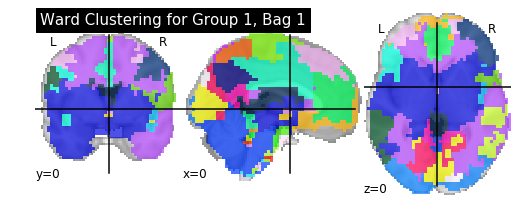

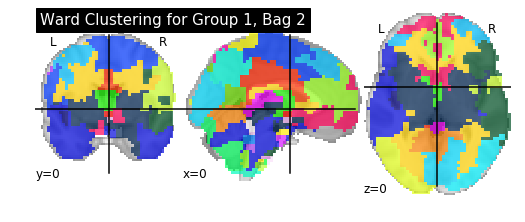

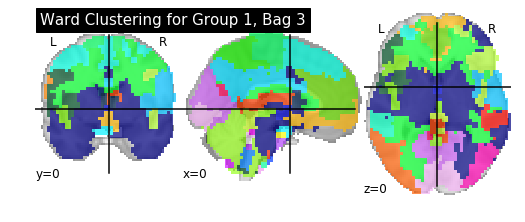

In [339]:
for x in range(0,3):
    ward1_plot = plotting.plot_roi(bagged1_images[x], 
                                   title=("Ward Clustering for Group 1, Bag " + str(x+1)), display_mode="ortho",
                                  cut_coords=(0,0,0))
    

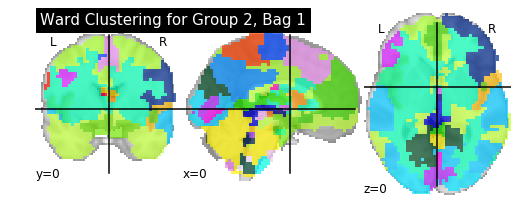

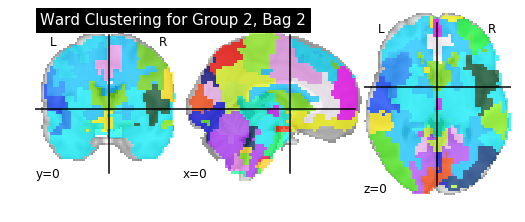

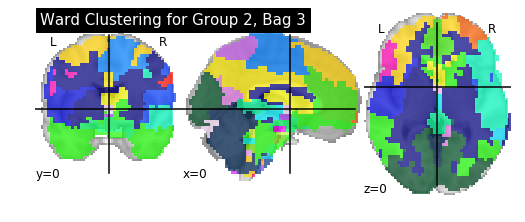

In [340]:
for x in range(0,3):
    ward2_plot = plotting.plot_roi(bagged2_images[x], 
                                   title=("Ward Clustering for Group 2, Bag " + str(x+1)), display_mode="ortho",
                                  cut_coords=(0,0,0))
    

As seen above, the clusterings are relatively different from each other. 


Now, the clusterings from the bags will be used to create one single clustering for each group.

Integrating the Bags' Parcellations Within Each Group
----------

In [359]:
#saving the Nifti images into files
for x in range(0,3):
    bagged1_images[x].to_filename("group1_bag" + str(x) + "_parcellation.nii.gz")
    bagged2_images[x].to_filename("group2_bag" + str(x) + "_parcellation.nii.gz")


#converting images to np arrays 
bagged1_np = []
bagged2_np = []

for x in range(0,3):
    nib_dummy = nib.load("group1_bag" + str(x) + "_parcellation.nii.gz")
    nib_dummy = np.array(nib_dummy.dataobj)
    bagged1_np.append(nib_dummy)

for x in range(0,3):
    nib_dummy = nib.load("group2_bag" + str(x) + "_parcellation.nii.gz")
    nib_dummy = np.array(nib_dummy.dataobj)
    bagged2_np.append(nib_dummy)


In [360]:
#turning these 3D arrays into 1D arrays
for x in range(0,3):
    bagged1_np[x] = np.ravel(bagged1_np[x])
    bagged2_np[x] = np.ravel(bagged2_np[x])


I'm stuck here
----

In [420]:
#trying to get adjacency matrices based off the arrays of cluster labels

bagged1_adjacency = []
bagged2_adjacency = []

from scipy import sparse

#methodology in the code below is from adjacency_matrix from PyBASC

for x in range(0,3):
    z = bagged1_np[x].copy()
    if(len(z.shape) == 1):
        z = z[:, np.newaxis]
    if(z.min() <= 0):
        z += -z.min()+1
    y = np.dot(z**-1.,z.T) == 1            #this is where the memory error occurs
    y = sparse.csr_matrix(y,dtype=bool)
    bagged1_adjacency.append(y)
    
    

MemoryError: 

In [423]:
#using PyBASC
from PyBASC import adjacency_matrix
testing = adjacency_matrix(bagged1_np[0])
print(testing) 
#also results in a memory error

MemoryError: 

Conclusion (...?)
--------
Basically, the most probable reason for the memory error and suspiciously high rand score is that the ADHD dataset scans include gray matter, which should be really similar between patients and takes up a lot of space. It's hard to say for sure, however. To see if this is the case, I will repeat this procedure with another set of data in a separate notebook to see what results I get.